##**... Meanwhile on 15 Dec 2020**
---
####I was quite familiar with softmax and negative log likelihood function. But below Crossentropy function from *pytorch.org* gave me headache. 
 
> ##### *author : alvinwatner*

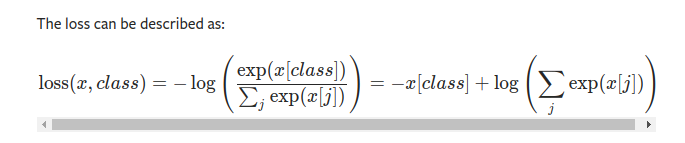
https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

#### If you feel the same way, then take a look how i tried to boil down above equation.
----
 
#### Based on my perspective, that above equation is not being consistent, since they seems like try to combine the math style with the programming style. Apparently when i look closely, well... that actually just softmax & negative natural log likelihood
 
 
#####...Now let's try to make it more mathy. 
 
 
---

######---- *Note : Notice that, i use the bold letter to represent a vector and non-bold as scalar. ----*

#### First of all, let's have a look how softmax function looks like in general,

> $$S(\mathbf{x}) = \mathbf{b}$$

#### The above function $S$ take an input vector $\mathbf{x}$ and output another vector $\mathbf{b}$.
> $$\mathbf{b} = [ b_{1}, b_{2}, \dots, b_{n}]$$
### Below is the calculation for each $b_i$
> $$b_i = \displaystyle \frac{e^x_i}{\sum_{i=1}^{n} e^x_j}$$
##### Since we make a use of the magical euler number $e$ , it turns out that the sum of $$b_{1}, b_{2}, \dots, b_{n} = 1.0$$
### Let the target class vector denoted as $\mathbf{c}$.
> $$\mathbf{c} = [ c_{1}, c_{2}, \dots, c_{n}]$$
### Let the  *$b_i$ that correspond to the target class $c_i$ equal to $b_c$* .
#### Then we attempt to maximize the $b_c$ by minimizing the negative natural log of $b_c$ shown as below
> ### $$loss( \mathbf{b} , \mathbf{c}) =  - ln(b_{c})$$ 







##### Let's see if it is true...

In [ ]:
_x_      = [0,2,0,1]
_target_ = [2]

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
 
x_torchTensor = Variable(torch.FloatTensor(_x_)).view(1, -1)
t_torchTensor = Variable(torch.LongTensor(_target_))
print(f"x_torchTensor = {x_torchTensor}")
print(f"t_torchTensor = {t_torchTensor}")

x_torchTensor = tensor([[0., 2., 0., 1.]])
t_torchTensor = tensor([2])


In [ ]:
# Cross Entropy Loss (Version)
criterion = nn.CrossEntropyLoss()
torchLoss = criterion(x_torchTensor, t_torchTensor)
print(f"Pytorch Cross Entropy Loss = {torchLoss}")

Cross Entropy Loss = 2.49381160736084


In [ ]:
# Negative Log Likelihood and Softmax (Version)
fsoftmax_ = nn.Softmax(dim=1)
outSoftmax = fsoftmax_(x_torchTensor)
softmax_t_ = outSoftmax[0,_target_] #index of target in outSoftmax
print(f"Softmax of x_torchTensor = {outSoftmax}")
print(f"The index of target from the softmax probability : {softmax_t_}")
''''''''
negLog = -1 * torch.log(softmax_t_)
print(f"Negative log of softmax_t_ = {negLog}")

Softmax of x_torchTensor = tensor([[0.0826, 0.6103, 0.0826, 0.2245]])
The index of target from the softmax probability : tensor([0.0826])
Negative log of softmax_t_ = tensor([2.4938])


In [ ]:
# No Torch, Let's use Numpy 
# Negative Log Likelihood and Softmax (Version)
import numpy as np 
 
x_npTensor = np.array(_x_)
t_npTensor = np.array(_target_)
 
def softmax_(x):
  softmax_vector  = np.array([])
  denominator = np.array([])
  
  ''' ∑ e^x_j '''
  for x_j in x:
    denominator = np.append(denominator, np.exp(x_j))  
  denominator = np.sum(denominator)
 
  ''' softmax_vector = [ e^x_i / ∑ e^x_j ]'''
  for numerator in x:
    softmax_vector = np.append(softmax_vector, np.exp(numerator)/denominator)
    
  return softmax_vector
 
def neglogLoss(softmax_vector, target_vector):
  negLog_vector = np.array([])
  
  for t in target_vector:    
    negLog = -1 * np.log(softmax_vector[t])
    negLog_vector = np.append(negLog_vector, negLog)
 
  return negLog_vector
 
softmax_vector = softmax_(x_npTensor)
 
negLog_Vector = neglogLoss(softmax_vector, t_npTensor)
print(f"Negative log of softmax_t_ = {negLog_Vector}")

Negative log of softmax_t_ = [2.49381171]


In [ ]:
# No Torch, Let's use Numpy 
# CrossEntropy Loss (Version)
 
def crossEntropyLoss(x, target_vector):
  softmax_vector = softmax_(x)
  negLog_vector  = neglogLoss(softmax_vector, target_vector)
 
  return negLog_Vector
 
npLoss = CrossEntropyLoss(x_npTensor, t_npTensor)
print(f"Cross Entropy Loss = {npLoss}")

Cross Entropy Loss = [2.49381171]
